# **1. Perkenalan Dataset**

## Used Car Price Prediction - CarDekho Dataset

Dataset ini berisi informasi tentang mobil bekas yang dijual di platform CarDekho, India. Dataset ini cocok untuk membangun model machine learning yang memprediksi harga jual mobil bekas berdasarkan berbagai fitur.

### Informasi Dataset:
- **Sumber**: Kaggle - CarDekho Used Car Dataset
- **Jumlah Data**: 4,341 mobil
- **Jumlah Fitur**: 8 kolom
- **Target Variable**: `selling_price` (harga jual mobil)

### Deskripsi Fitur:
| Fitur | Tipe | Deskripsi |
|-------|------|----------|
| name | String | Nama model mobil |
| year | Integer | Tahun pembuatan mobil |
| selling_price | Integer | Harga jual mobil (Target) |
| km_driven | Integer | Jarak tempuh dalam kilometer |
| fuel | Categorical | Jenis bahan bakar (Petrol/Diesel/CNG/LPG) |
| seller_type | Categorical | Tipe penjual (Individual/Dealer/Trustmark Dealer) |
| transmission | Categorical | Tipe transmisi (Manual/Automatic) |
| owner | Categorical | Status kepemilikan (First Owner/Second Owner/dll) |


# **2. Import Library**

Pada tahap ini, kita mengimpor pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, kita memuat dataset ke dalam notebook menggunakan pandas dan memeriksa struktur data.

In [2]:
# load dataset
df = pd.read_csv('../dataset_raw/CAR DETAILS FROM CAR DEKHO.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# informasi dasar dataset
print(f"Jumlah baris (data): {df.shape[0]}")
print(f"Jumlah kolom (fitur): {df.shape[1]}")
print(f"\nNama kolom: {list(df.columns)}")

Jumlah baris (data): 4340
Jumlah kolom (fitur): 8

Nama kolom: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [4]:
# Informasi tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset.

**Tujuan EDA:**
1. Memeriksa missing values dan duplikasi
2. Memahami distribusi setiap fitur
3. Menganalisis korelasi antar fitur
4. Mendeteksi outliers

## 4.1 Memeriksa Missing Values

In [6]:
# Memeriksa missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_df)
print(f"\nTotal missing values: {missing_values.sum()}")

               Missing Values  Percentage (%)
name                        0             0.0
year                        0             0.0
selling_price               0             0.0
km_driven                   0             0.0
fuel                        0             0.0
seller_type                 0             0.0
transmission                0             0.0
owner                       0             0.0

Total missing values: 0


## 4.2 Memeriksa Duplikasi Data

In [7]:
# Memeriksa duplikasi

duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
print(f"Persentase duplikat: {(duplicates / len(df)) * 100:.2f}%")

# Menampilkan contoh data duplikat
if duplicates > 0:
    print("\nContoh data duplikat:")
    display(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 763
Persentase duplikat: 17.58%

Contoh data duplikat:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


## 4.3 Analisis Fitur Kategorikal

In [8]:
# Analisis fitur kategorikal
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())


FUEL:
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

SELLER_TYPE:
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

TRANSMISSION:
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

OWNER:
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


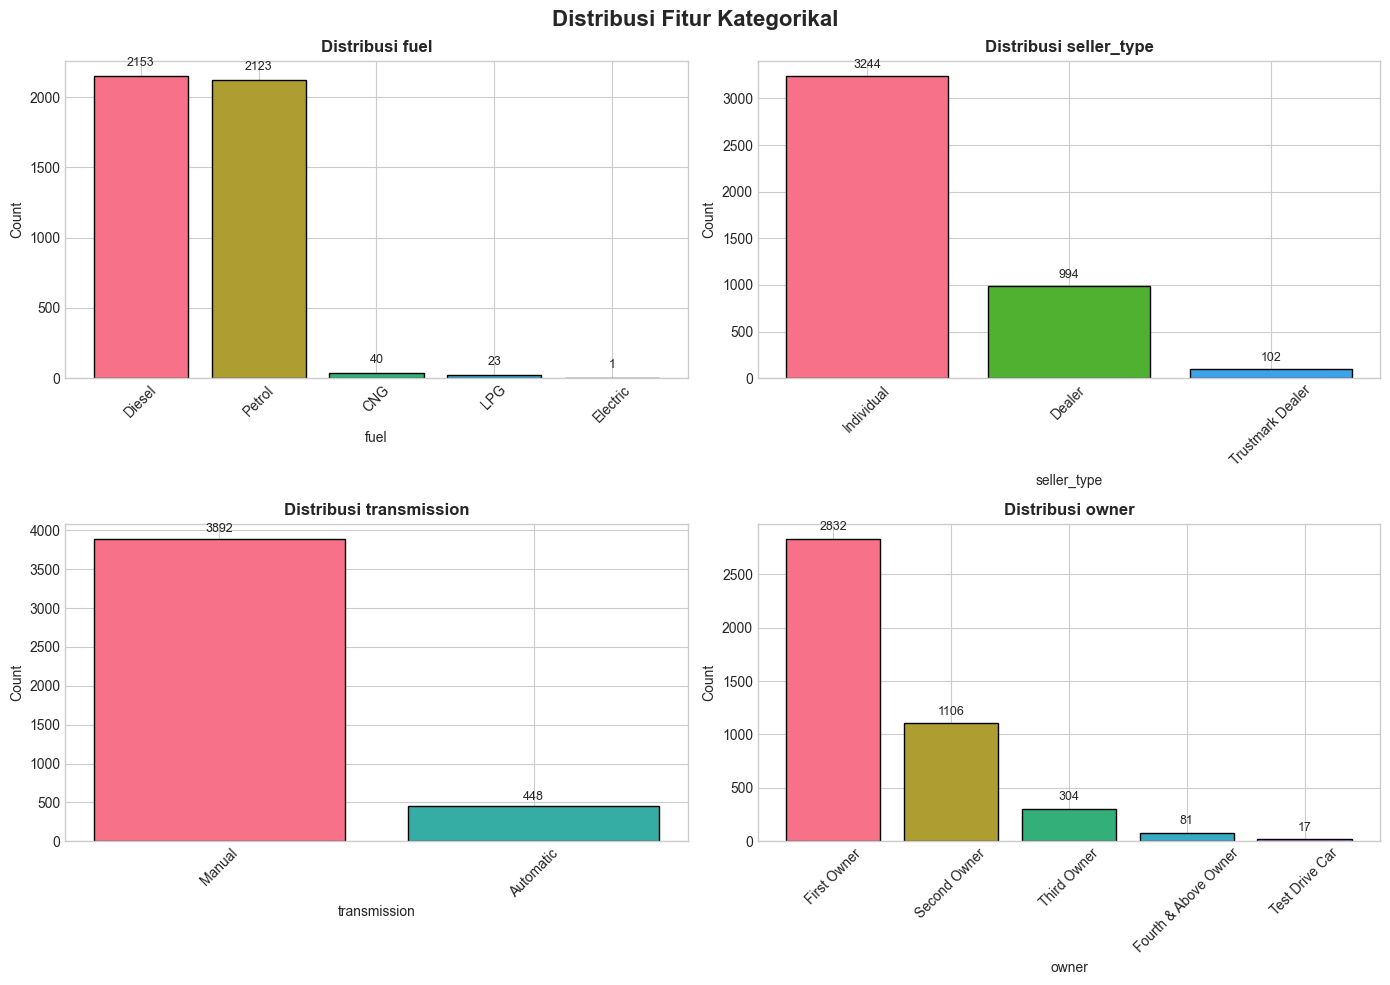

In [9]:
# Visualisasi distribusi fitur kategorikal
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribusi Fitur Kategorikal', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_cols):
    ax = axes[idx // 2, idx % 2]
    value_counts = df[col].value_counts()
    colors = sns.color_palette('husl', len(value_counts))
    
    bars = ax.bar(value_counts.index, value_counts.values, color=colors, edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
    # Menambahkan label nilai di atas bar
    for bar, val in zip(bars, value_counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 4.4 Analisis Fitur Numerik

In [10]:
# Analisis fitur numerik
numerical_cols = ['year', 'selling_price', 'km_driven']

print(df[numerical_cols].describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


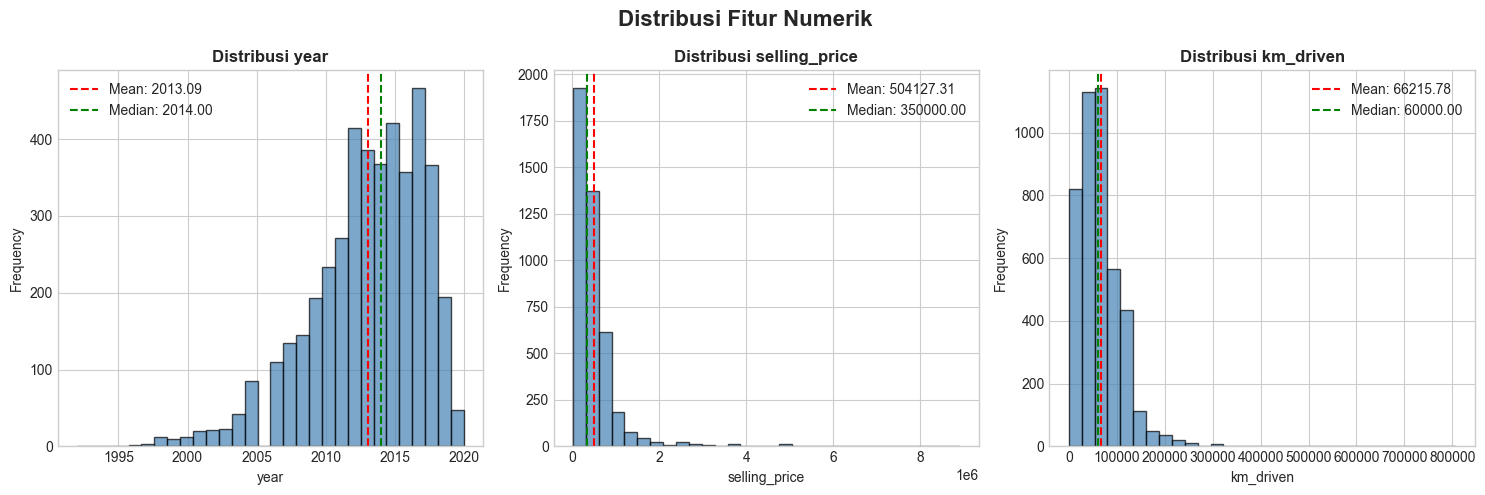

In [11]:
# Visualisasi distribusi fitur numerik (Histogram)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribusi Fitur Numerik', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    ax.hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

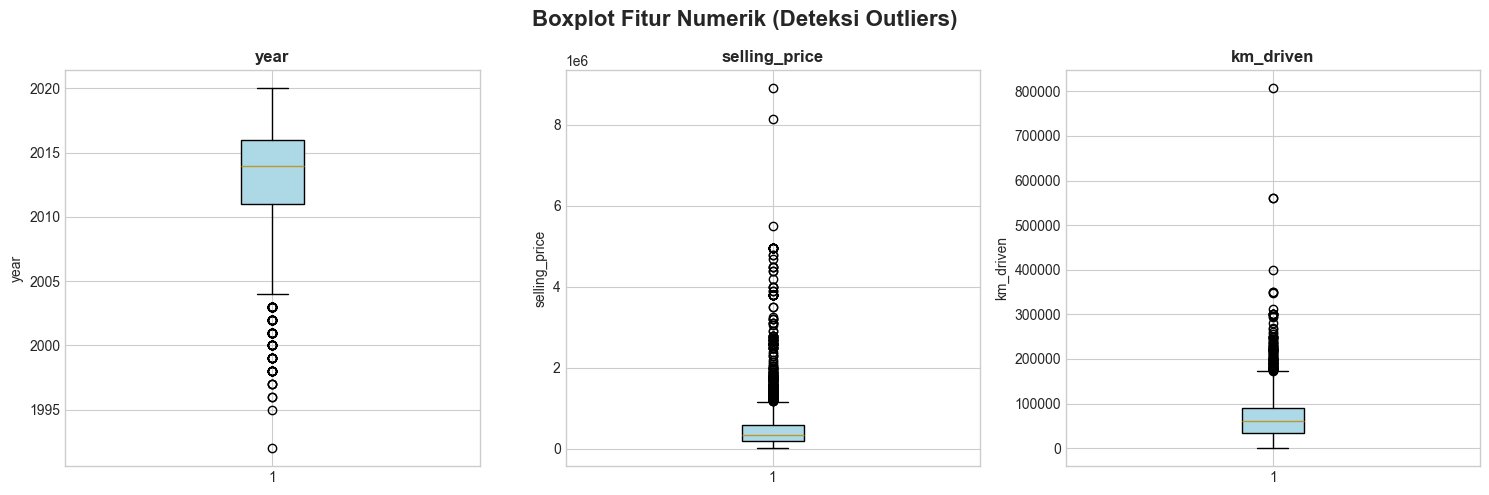

In [12]:
# Boxplot untuk mendeteksi outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Boxplot Fitur Numerik (Deteksi Outliers)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    bp = ax.boxplot(df[col], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

## 4.5 Analisis Korelasi

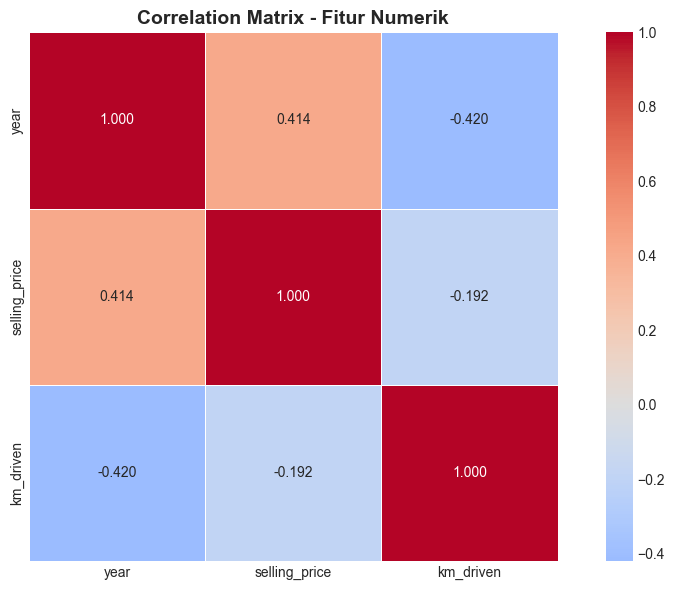


Interpretasi Korelasi:
- Korelasi year vs selling_price: 0.414
- Korelasi km_driven vs selling_price: -0.192


In [13]:
# Heatmap korelasi
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', linewidths=0.5, square=True)
plt.title('Correlation Matrix - Fitur Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nInterpretasi Korelasi:")
print(f"- Korelasi year vs selling_price: {correlation_matrix.loc['year', 'selling_price']:.3f}")
print(f"- Korelasi km_driven vs selling_price: {correlation_matrix.loc['km_driven', 'selling_price']:.3f}")

## 4.6 Analisis Target Variable (Selling Price)

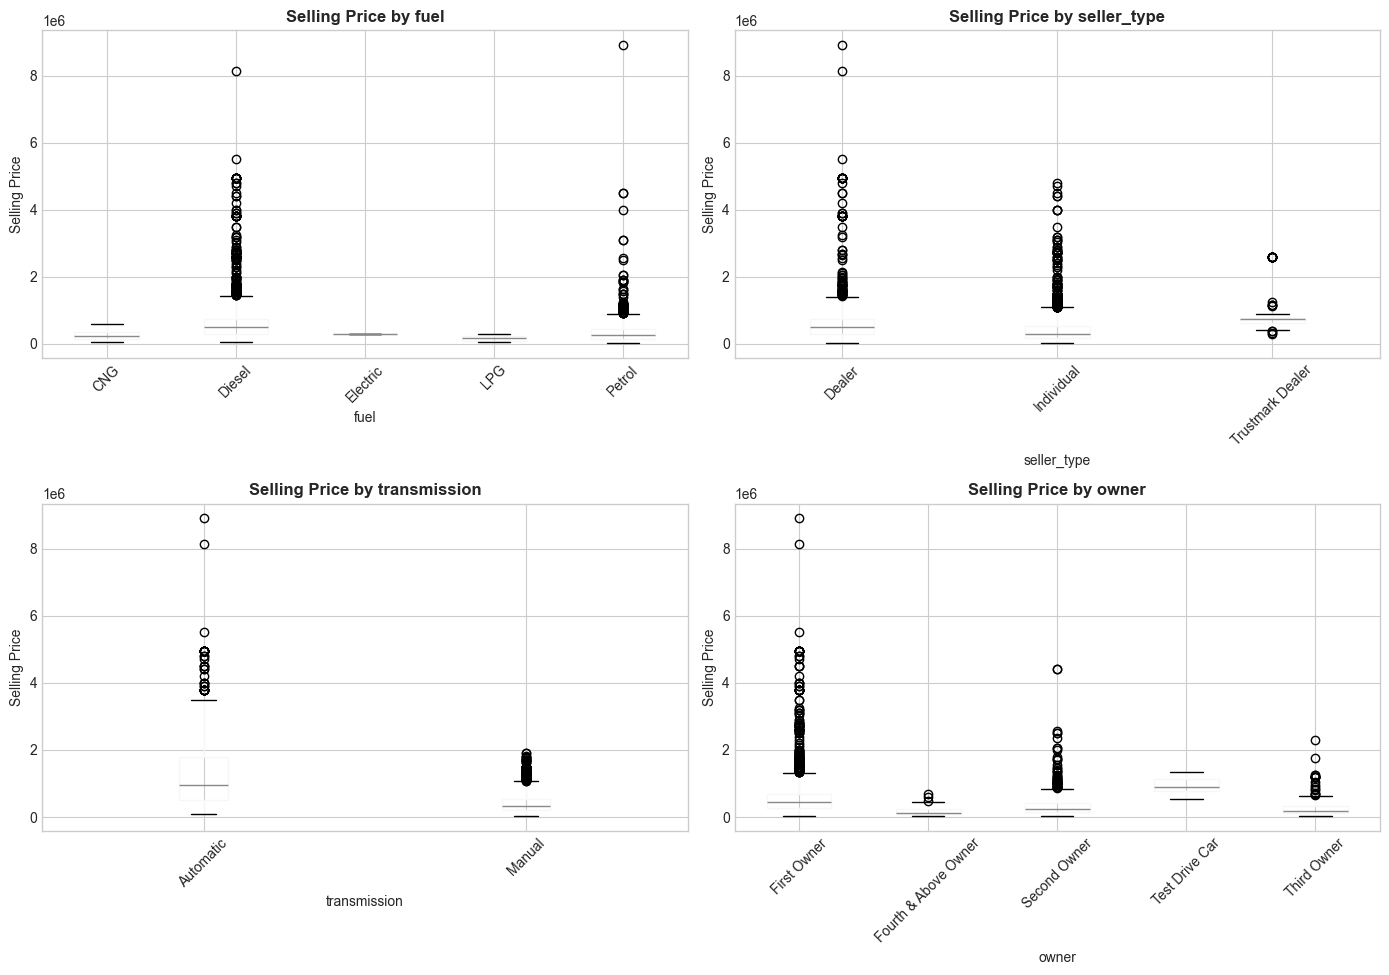

In [14]:
# Analisis target variable berdasarkan kategori
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Selling Price berdasarkan Fitur Kategorikal', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_cols):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column='selling_price', by=col, ax=ax)
    ax.set_title(f'Selling Price by {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Selling Price')
    plt.suptitle('')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

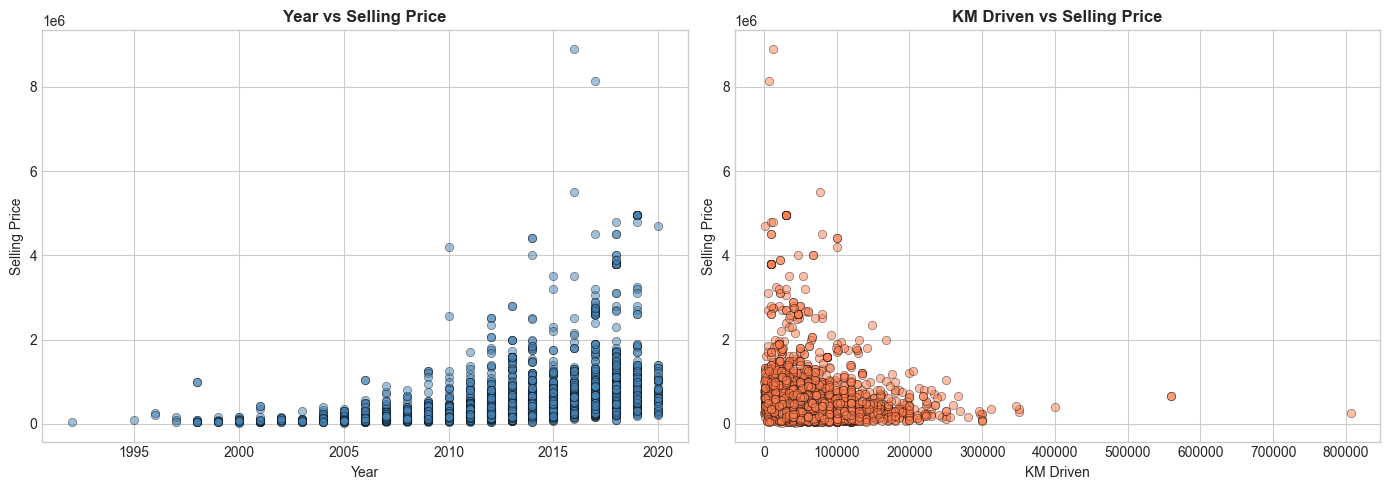

In [15]:
# Scatter plot: Year vs Selling Price
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Year vs Selling Price
axes[0].scatter(df['year'], df['selling_price'], alpha=0.5, c='steelblue', edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Selling Price')
axes[0].set_title('Year vs Selling Price', fontsize=12, fontweight='bold')

# KM Driven vs Selling Price
axes[1].scatter(df['km_driven'], df['selling_price'], alpha=0.5, c='coral', edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('KM Driven')
axes[1].set_ylabel('Selling Price')
axes[1].set_title('KM Driven vs Selling Price', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 4.7 Ringkasan EDA

**Temuan dari EDA:**

1. **Missing Values**: Dataset tidak memiliki missing values.
2. **Duplikasi**: Terdapat beberapa data duplikat yang perlu dihapus.
3. **Distribusi Harga**: Distribusi selling_price sangat skewed ke kanan (banyak mobil murah, sedikit mobil mahal).
4. **Fitur Kategorikal**:
   - Fuel: Mayoritas Petrol dan Diesel
   - Seller Type: Mayoritas Individual
   - Transmission: Mayoritas Manual
   - Owner: Mayoritas First Owner
5. **Korelasi**: Year memiliki korelasi positif dengan selling_price (mobil lebih baru = lebih mahal).

# **5. Data Preprocessing**

Berdasarkan hasil EDA, berikut tahapan preprocessing yang akan dilakukan:

1. Menghapus data duplikat
2. Feature Engineering (menambah fitur car_age)
3. Encoding fitur kategorikal
4. Handling outliers
5. Normalisasi/Standarisasi fitur numerik
6. Split data (train-test)

## 5.1 Menghapus Data Duplikat

In [16]:
# Membuat copy dataset untuk preprocessing
df_clean = df.copy()

# Menghapus duplikat
print(f"Jumlah data sebelum hapus duplikat: {len(df_clean)}")
df_clean = df_clean.drop_duplicates()
print(f"Jumlah data setelah hapus duplikat: {len(df_clean)}")
print(f"Data yang dihapus: {len(df) - len(df_clean)}")

Jumlah data sebelum hapus duplikat: 4340
Jumlah data setelah hapus duplikat: 3577
Data yang dihapus: 763


## 5.2 Feature Engineering

In [17]:
# Menambahkan fitur car_age (usia mobil)
current_year = 2025
df_clean['car_age'] = current_year - df_clean['year']

print("Fitur 'car_age' berhasil ditambahkan!")
print(f"\nStatistik car_age:")
print(df_clean['car_age'].describe())

Fitur 'car_age' berhasil ditambahkan!

Statistik car_age:
count    3577.000000
mean       12.037462
std         4.251759
min         5.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        33.000000
Name: car_age, dtype: float64


In [18]:
# Menghapus kolom 'name' karena tidak relevan untuk prediksi
# dan kolom 'year' karena sudah digantikan dengan 'car_age'
df_clean = df_clean.drop(['name', 'year'], axis=1)

print("Kolom 'name' dan 'year' berhasil dihapus!")
print(f"\nKolom yang tersisa: {list(df_clean.columns)}")

Kolom 'name' dan 'year' berhasil dihapus!

Kolom yang tersisa: ['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age']


## 5.3 Encoding Fitur Kategorikal

In [19]:
# Label Encoding untuk fitur kategorikal
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Membuat dictionary untuk menyimpan encoder
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    
    # Menampilkan mapping
    print(f"\n{col.upper()} Encoding:")
    for idx, label in enumerate(le.classes_):
        print(f"  {label} -> {idx}")

print("Encoding fitur kategorikal selesai!")


FUEL Encoding:
  CNG -> 0
  Diesel -> 1
  Electric -> 2
  LPG -> 3
  Petrol -> 4

SELLER_TYPE Encoding:
  Dealer -> 0
  Individual -> 1
  Trustmark Dealer -> 2

TRANSMISSION Encoding:
  Automatic -> 0
  Manual -> 1

OWNER Encoding:
  First Owner -> 0
  Fourth & Above Owner -> 1
  Second Owner -> 2
  Test Drive Car -> 3
  Third Owner -> 4
Encoding fitur kategorikal selesai!


In [20]:
# Menampilkan data setelah encoding
print("Data setelah encoding:")
df_clean.head(10)

Data setelah encoding:


,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,4,1,1,0,18
1,135000,50000,4,1,1,0,18
2,600000,100000,1,1,1,0,13
3,250000,46000,4,1,1,0,8
4,450000,141000,1,1,1,2,11
5,140000,125000,4,1,1,0,18
6,550000,25000,4,1,1,0,9
7,240000,60000,4,1,1,2,11
8,850000,25000,4,1,1,0,10
9,365000,78000,0,1,1,0,8


## 5.4 Handling Outliers

In [21]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

# Mendeteksi outliers
numerical_cols = ['selling_price', 'km_driven', 'car_age']

print("DETEKSI OUTLIERS (IQR Method)")

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"\n{col}:")
    print(f"  Lower Bound: {lower:.2f}")
    print(f"  Upper Bound: {upper:.2f}")
    print(f"  Jumlah Outliers: {outliers} ({outliers/len(df_clean)*100:.2f}%)")

DETEKSI OUTLIERS (IQR Method)

selling_price:
  Lower Bound: -400000.00
  Upper Bound: 1200000.00
  Jumlah Outliers: 170 (4.75%)

km_driven:
  Lower Bound: -45000.00
  Upper Bound: 171000.00
  Jumlah Outliers: 106 (2.96%)

car_age:
  Lower Bound: 0.00
  Upper Bound: 24.00
  Jumlah Outliers: 37 (1.03%)


## 5.5 Normalisasi Fitur Numerik

In [22]:
# Memisahkan fitur dan target
X = df_clean.drop('selling_price', axis=1)
y = df_clean['selling_price']

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"\nFitur: {list(X.columns)}")

Shape X: (3577, 6)
Shape y: (3577,)

Fitur: ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age']


In [23]:
# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()

# Kolom yang akan dinormalisasi (hanya kolom numerik continuous)
cols_to_scale = ['km_driven', 'car_age']

X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

print("\nStatistik setelah normalisasi:")
print(X_scaled[cols_to_scale].describe())


Statistik setelah normalisasi:
          km_driven       car_age
count  3.577000e+03  3.577000e+03
mean  -9.932104e-18  5.959263e-18
std    1.000140e+00  1.000140e+00
min   -1.455639e+00 -1.655420e+00
25%   -6.989331e-01 -7.145010e-01
50%   -1.944483e-01 -8.812070e-03
75%    4.361577e-01  6.968769e-01
max    1.549921e+01  4.931011e+00


## 5.6 Split Data (Train-Test)

In [24]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

Training set: 2861 samples (80.0%)
Testing set: 716 samples (20.0%)


## 5.7 Menyimpan Data Terproses

In [25]:
# Menyimpan data terproses
# Menggabungkan kembali X dan y
df_processed = X_scaled.copy()
df_processed['selling_price'] = y.values

# Menyimpan ke file CSV
output_path = '../dataset_preprocessing/car_data_processed.csv'
df_processed.to_csv(output_path, index=False)

print(f"Data terproses berhasil disimpan ke: {output_path}")
print(f"\nShape data terproses: {df_processed.shape}")
print(f"\nKolom: {list(df_processed.columns)}")

Data terproses berhasil disimpan ke: ../dataset_preprocessing/car_data_processed.csv

Shape data terproses: (3577, 7)

Kolom: ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age', 'selling_price']


In [26]:
# Menampilkan sample data terproses
df_processed.head()

,km_driven,fuel,seller_type,transmission,owner,car_age,selling_price
0,0.015754,4,1,1,0,1.402566,60000
1,-0.404650,4,1,1,0,1.402566,135000
2,0.646360,1,1,1,0,0.226418,600000
3,-0.488731,4,1,1,0,-0.949731,250000
4,1.508188,1,1,1,2,-0.244042,450000


# **6. Ringkasan Preprocessing**

## Tahapan yang Dilakukan:

1. **Hapus Duplikat**: Menghapus baris data yang duplikat
2. **Feature Engineering**: Menambahkan fitur `car_age` dari kolom `year`
3. **Hapus Kolom Tidak Relevan**: Menghapus kolom `name` dan `year`
4. **Label Encoding**: Mengubah fitur kategorikal (fuel, seller_type, transmission, owner) menjadi numerik
5. **Normalisasi**: Menerapkan StandardScaler pada fitur `km_driven` dan `car_age`
6. **Train-Test Split**: Membagi data menjadi 80% training dan 20% testing